<h2>Data Wrangling 2</h2>

__1. Missing Values__

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [40]:
df = pd.read_csv('autodata.csv')
print(df)

     Unnamed: 0  symboling  normalized-losses         make aspiration  \
0             0          3                122  alfa-romero        std   
1             1          3                122  alfa-romero        std   
2             2          1                122  alfa-romero        std   
3             3          2                164         audi        std   
4             4          2                164         audi        std   
..          ...        ...                ...          ...        ...   
196         196         -1                 95        volvo        std   
197         197         -1                 95        volvo      turbo   
198         198         -1                 95        volvo        std   
199         199         -1                 95        volvo      turbo   
200         200         -1                 95        volvo      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd  

In [41]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Low,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Low,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Low,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Low,0,1


In [42]:
df.isnull().sum()

Unnamed: 0           0
symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    2
diesel               0
gas                  0
dtype: int64

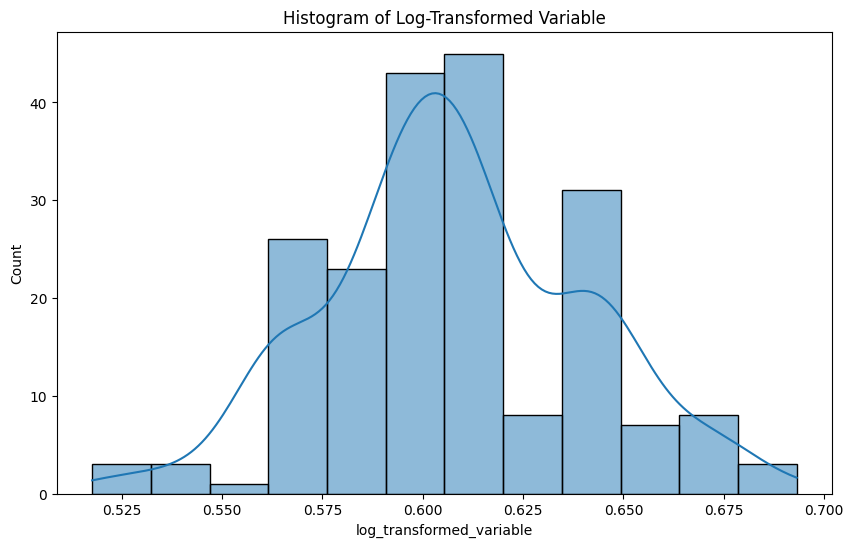

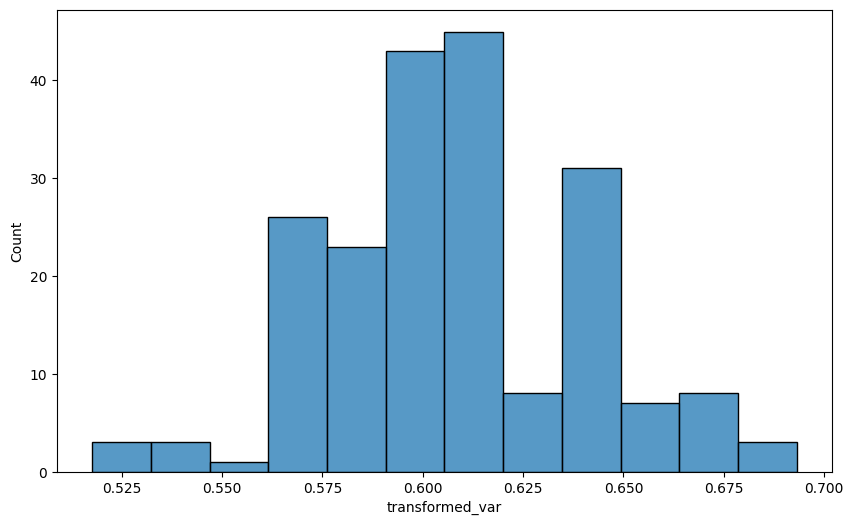

In [43]:
df['log_transformed_variable'] = np.log(df['length'] + 1)  # Adding 1 to handle zero values

# Visualize the transformation
plt.figure(figsize=(10, 6))
sns.histplot(df['log_transformed_variable'], kde=True)
plt.title("Histogram of Log-Transformed Variable")
plt.show()


df['transformed_var'] = np.log(df['length']+1)
plt.figure(figsize=(10,6))
sns.histplot(df['transformed_var'],kde=False)
plt.show()

<h5>1.1 Dropping the column</h5>

In [44]:
df.drop(columns=['horsepower-binned'],axis=0,inplace=True)

<h5>1.2 Replacing the missing vals with mean/mode/median using replace method</h5>

In [45]:
avg_stroke = df['stroke'].astype("float").mean(axis=0)
df['stroke'] = df['stroke'].replace(np.nan,avg_stroke)

In [46]:
mode_horse = df['horsepower'].astype("float").mode()
fin_mode = mode_horse[0]
df['horsepower'] = df['horsepower'].replace(np.nan,fin_mode)

In [47]:
med_peakrpm = df['peak-rpm'].astype("float").median()
df['peak-rpm'] = df['peak-rpm'].replace(np.nan,med_peakrpm)

In [48]:
df.isnull().sum()

Unnamed: 0                  0
symboling                   0
normalized-losses           0
make                        0
aspiration                  0
num-of-doors                0
body-style                  0
drive-wheels                0
engine-location             0
wheel-base                  0
length                      0
width                       0
height                      0
curb-weight                 0
engine-type                 0
num-of-cylinders            0
engine-size                 0
fuel-system                 0
bore                        0
stroke                      0
compression-ratio           0
horsepower                  0
peak-rpm                    0
city-mpg                    0
highway-mpg                 0
price                       0
city-L/100km                0
diesel                      0
gas                         0
log_transformed_variable    0
transformed_var             0
dtype: int64

__2. Outlier__

<h5>* Detecting outliers</h5>
<h5>outlier is an observation from the dataset that lies far from the other observation in the dataset. It is like an odd an out</h5>

1. To detect an outlier , we have following methods:
    * box plot
    * Scatterplot
    * Z-Score
    * Inter Quantile Range (IQR)

<h5>2.1 Boxplot</h5>

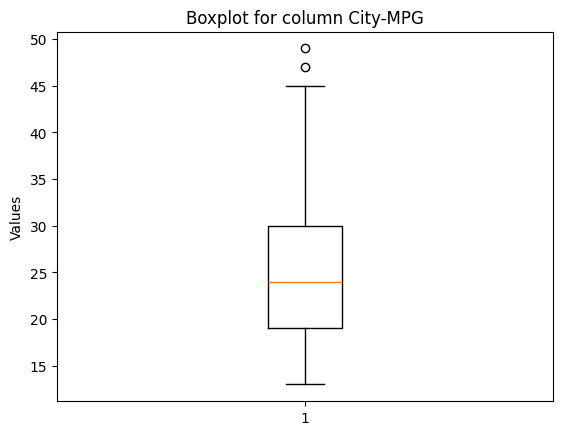

In [49]:
plt.boxplot(df['city-mpg'])
plt.title("Boxplot for column City-MPG")
plt.ylabel('Values')
plt.show()

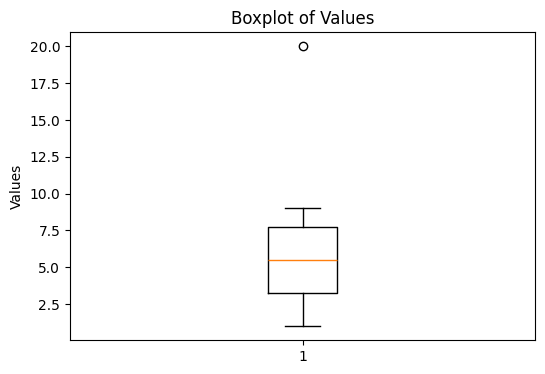

In [50]:
data = {'values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 20]}

# Create DataFrame
df = pd.DataFrame(data)

# Create a boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(df['values'])
plt.title('Boxplot of Values')
plt.ylabel('Values')
plt.show()

__2.2 Scatterplot__

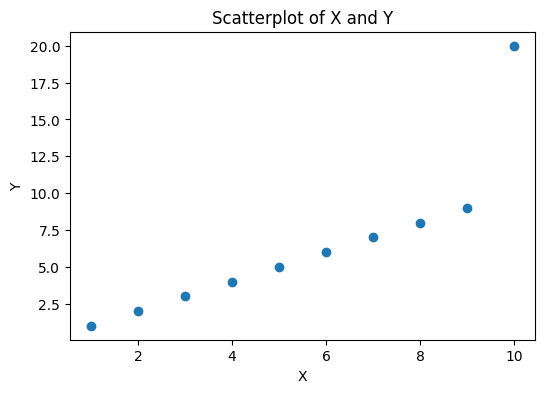

In [51]:
# Example data
data = {'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y': [1, 2, 3, 4, 5, 6, 7, 8, 9, 20]}  # Including an outlier

# Create DataFrame
df = pd.DataFrame(data)

# Create a scatterplot
plt.figure(figsize=(6, 4))
plt.scatter(df['x'], df['y'])
plt.title('Scatterplot of X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [52]:
# Example data
data = {'values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 120]}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate z-scores
z_scores = (df['values'] - df['values'].mean()) / df['values'].std()

# Set threshold for outlier detection (e.g., z-score > 3)
threshold = 2
#Based on the z-scores, we can see if any points are more than 2 standard deviations away from the mean. 

# Find outliers
outliers = df[np.abs(z_scores) > threshold]

print("Outliers:")
print(outliers)


Outliers:
   values
9     120


In [53]:
# Example data
data = {'values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 20]}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['values'].quantile(0.25)
Q3 = df['values'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Set lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['values'] < lower_bound) | (df['values'] > upper_bound)]

print("Outliers:")
print(outliers)


Outliers:
   values
9      20


<h5>* Dealing with Outlier</h5>

__2.1 Trimming/Removing the Outlier__

In [54]:
data = {'values': [1,2,3,4,5,6,7,8,9,10]} 
df = pd.DataFrame(df)  #with outlier

Q1 = df['values'].quantile(0.25)
Q3 = df['values'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

trimmed_df = df[ (df['values'] >=lower_bound) & (df['values'] <= upper_bound)  ] #removing outliers

print(trimmed_df) # without outlier

   values
0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9


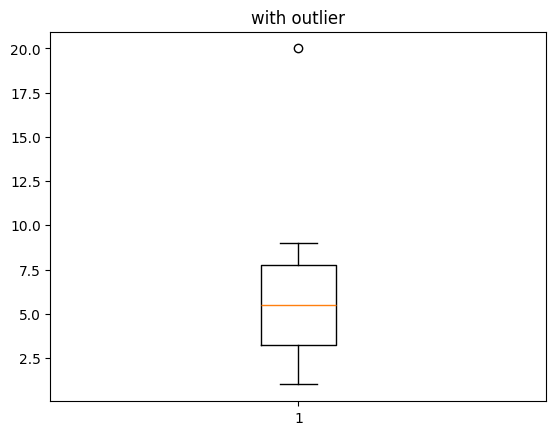

C:\Users\KARTIKI\AppData\Local\Temp\ipykernel_12396\1709590179.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['values']>10,'values'] = median


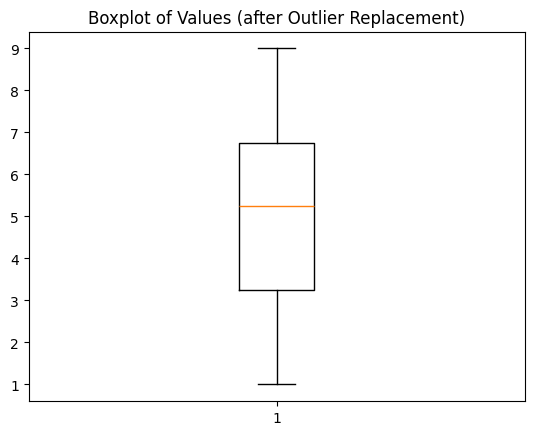

DataFrame after outlier replacement:
   values
0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     6.0
6     7.0
7     8.0
8     9.0
9     5.5


In [55]:
data = {'values': [1,2,3,4,5,6,7,8,9,20]} 
df = pd.DataFrame(df)  #with outlier
plt.boxplot(df['values'])
plt.title("with outlier")
plt.show()

median = df['values'].median()

df.loc[df['values']>10,'values'] = median
plt.boxplot(df['values'])
plt.title('Boxplot of Values (after Outlier Replacement)')
plt.show()

print("DataFrame after outlier replacement:")
print(df)

__3. Data Transformating__

In [56]:
df['log_transformed_variable'] = np.log(df['length'] + 1)  # Adding 1 to handle zero values

# Visualize the transformation
plt.figure(figsize=(10, 6))
sns.histplot(df['log_transformed_variable'], kde=True)
plt.title("Histogram of Log-Transformed Variable")
plt.show()

KeyError: 'length'